# Emotional Reactions and Family Resilience During COVID-19 Lockdown Period among Bangladeshi Families

This is a research project that focuses on the emotional reactions and family resilience of Bangladeshi families during the COVID-19 lockdown period. The purpose of the research is to understand the relationship of how the emotional states of families have been affected based on the structure of the family during lockdown.


Link the Raw dataset: https://docs.google.com/spreadsheets/d/198xL5kbwpnliULZOpA2ioFwf9xhs6vERb0FILgEkVQ0/edit?resourcekey#gid=2087467107

In [1]:
# loading the esstential libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
# read the dataset 

df = pd.read_csv('Dataset_OnEmotion - Form Responses 1.csv')
print(df.shape)
df.head()

(450, 27)


,Timestamp,Please enter your age:,Please Choose your gender:,Marital Status:,What is your profession?,What is your monthly income?,How would you describe your family?,What is the total number of members in your family?,"What is the approximate ""average"" age of your family?",The number of Adults in your family,...,How would you describe the feeling of love in your family?,The lockdown period has allowed your family members to enjoy the time they spend together.,Your family is satisfied with how things are during lockdown.,Your family is thankful with what they have during the lockdown period.,Do you sense fear within the family?,Do you sense anxiety within the family?,How often do fights break out between family members?,Your family members understand and respect each others personal privacy.,What are your Family Reactions whenever a difficult situation arises?,What is the general reaction of the family when there is some form of good news?
0,8/9/2021 15:27:58,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,...,It is the same as before the lockdown period,Agree,Neutral,Neutral,Not at all.,Not at all.,Problems are often resolved before fights brea...,Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
1,8/9/2021 15:36:19,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,...,It is the same as before the lockdown period,Agree,Agree,Agree,I do feel it sometimes.,I do feel it sometimes.,There hasn't been any major issue that would c...,Strongly Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
2,8/9/2021 15:37:20,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,...,It is the same as before the lockdown period,Strongly Agree,Agree,Neutral,I haven't paid attention.,I do feel it sometimes.,I haven't paid attention.,Strongly Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
3,8/9/2021 15:40:01,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,...,It is the same as before the lockdown period,Neutral,Neutral,Agree,Not at all.,I don't feel like there is.,There hasn't been any major issue that would c...,Agree,All of us come together and work towards a sol...,There is very little celebration on such occas...
4,8/9/2021 15:42:05,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,...,It has increased a lot during the lockdown period,Neutral,Neutral,Disagree,I do feel it sometimes.,I do feel it sometimes.,There hasn't been any major issue that would c...,Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...


In [3]:
#Unique value count
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature----->", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature---->", cols, " has ", len(unique_vals), " unique values")

Feature----> Timestamp  has  450  unique values
Feature----> Please enter your age:  has  27  unique values
Feature-----> Please Choose your gender:  has  2  unique values ---->  ['Female' 'Male']
Feature-----> Marital Status:  has  5  unique values ---->  ['Unmarried' 'Widowed' 'Married' 'Decline to respond' 'Divorced']
Feature-----> What is your profession?  has  4  unique values ---->  ['Student' 'Unemployed' 'Employed' 'Personal Business']
Feature-----> What is your monthly income?  has  7  unique values ---->  ['I do not have any income at the moment' 'Less than 10,000 BDT'
 'More than 100,000 BDT' '10,000 - 39,000 BDT' '40,000 - 69,999 BDT'
 '70,000 - 100,000 BDT' 'Decline to respond']
Feature-----> How would you describe your family?  has  2  unique values ---->  ['Nuclear Family' 'Extended Family']
Feature----> What is the total number of members in your family?  has  17  unique values
Feature----> What is the approximate "average" age of your family?  has  69  unique values
Fe

In [4]:
df.columns

Index(['Timestamp', 'Please enter your age:', 'Please Choose your gender:',
       'Marital Status:', 'What is your profession?',
       'What is your monthly income?', 'How would you describe your family?',
       'What is the total number of members in your family?',
       'What is the approximate "average" age of your family?',
       'The number of Adults in your family',
       'The number of Children in your family',
       'How would you describe your area of residence?',
       'How many people earn for your family?',
       'What is your family's monthly income?',
       'Has any of your family members contracted COVID-19?',
       'Have you lost any family member(s) due to COVID-19?',
       'How would you describe the ease of access to the nearest medical support from your area of residence?',
       'How would you describe the feeling of love in your family?',
       'The lockdown period has allowed your family members to enjoy the time they spend together.',
       'Your 

In [5]:
#Droping the Timestamp column
df= df.drop(columns="Timestamp")

df.shape

(450, 26)

In [6]:
#Renaming the column titles.
newAttributeNames = {'Please enter your age:':'sub_age', 'Please Choose your gender:': 'sub_gender',
       'Marital Status:':'m_stat', 'What is your profession?':'sub_prof',
       'What is your monthly income?':'sub_income', 'How would you describe your family?':'fam_struct',
       'What is the total number of members in your family?':'fam_memCount',
       'What is the approximate "average" age of your family?':'fam_age',
       'The number of Adults in your family':'fam_adultCount',
       'The number of Children in your family':'fam_childCount',
       'How would you describe your area of residence?':'fam_res',
       'How many people earn for your family?':'fam_earnerCount',
       "What is your family's monthly income?":'fam_income',
       'Has any of your family members contracted COVID-19?':'covidStat',
       'Have you lost any family member(s) due to COVID-19?':'covidLoss',
       'How would you describe the ease of access to the nearest medical support from your area of residence?':'medAccess',
       'How would you describe the feeling of love in your family?': 'emotion_love',
       'The lockdown period has allowed your family members to enjoy the time they spend together.':'emotion_enjoyment',
       'Your family is satisfied with how things are during lockdown.': 'emotion_satisfaction',
       'Your family is thankful with what they have during the lockdown period.': 'emotion_thankful',
       'Do you sense fear within the family?':'emotion_fear',
       'Do you sense anxiety within the family?':'emotion_anxiety',
       'How often do fights break out between family members?':'resilience_fights',
       'Your family members understand and respect each others personal privacy.':'resilience_privacy',
       'What are your Family Reactions whenever a difficult situation arises?':'resilience_crisis',
       'What is the general reaction of the family when there is some form of good news?':'resilience_celebration'
      }


In [7]:
df.rename(newAttributeNames, axis=1, inplace=True)


In [8]:
## checking for null values
df.isnull().sum()

sub_age                   0
sub_gender                0
m_stat                    0
sub_prof                  0
sub_income                0
fam_struct                0
fam_memCount              0
fam_age                   0
fam_adultCount            0
fam_childCount            0
fam_res                   0
fam_earnerCount           0
fam_income                0
covidStat                 0
covidLoss                 0
medAccess                 0
emotion_love              0
emotion_enjoyment         0
emotion_satisfaction      0
emotion_thankful          0
emotion_fear              0
emotion_anxiety           0
resilience_fights         0
resilience_privacy        0
resilience_crisis         0
resilience_celebration    0
dtype: int64

In [9]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(449, 26)


In [10]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,resilience_fights,resilience_privacy,resilience_crisis,resilience_celebration
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,It is the same as before the lockdown period,Agree,Neutral,Neutral,Not at all.,Not at all.,Problems are often resolved before fights brea...,Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,It is the same as before the lockdown period,Agree,Agree,Agree,I do feel it sometimes.,I do feel it sometimes.,There hasn't been any major issue that would c...,Strongly Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,It is the same as before the lockdown period,Strongly Agree,Agree,Neutral,I haven't paid attention.,I do feel it sometimes.,I haven't paid attention.,Strongly Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,It is the same as before the lockdown period,Neutral,Neutral,Agree,Not at all.,I don't feel like there is.,There hasn't been any major issue that would c...,Agree,All of us come together and work towards a sol...,There is very little celebration on such occas...
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,It has increased a lot during the lockdown period,Neutral,Neutral,Disagree,I do feel it sometimes.,I do feel it sometimes.,There hasn't been any major issue that would c...,Agree,All of us come together and work towards a sol...,We all celebrate together and hope for an even...


# Dropping Resilences Part

In [11]:
#Since we are not working with Family Resilience, dropping the resilience columns.
drop_col=["resilience_fights","resilience_privacy","resilience_crisis","resilience_celebration"]

In [12]:
df.drop(drop_col,axis=1, inplace=True)

In [13]:
df.columns

Index(['sub_age', 'sub_gender', 'm_stat', 'sub_prof', 'sub_income',
       'fam_struct', 'fam_memCount', 'fam_age', 'fam_adultCount',
       'fam_childCount', 'fam_res', 'fam_earnerCount', 'fam_income',
       'covidStat', 'covidLoss', 'medAccess', 'emotion_love',
       'emotion_enjoyment', 'emotion_satisfaction', 'emotion_thankful',
       'emotion_fear', 'emotion_anxiety'],
      dtype='object')

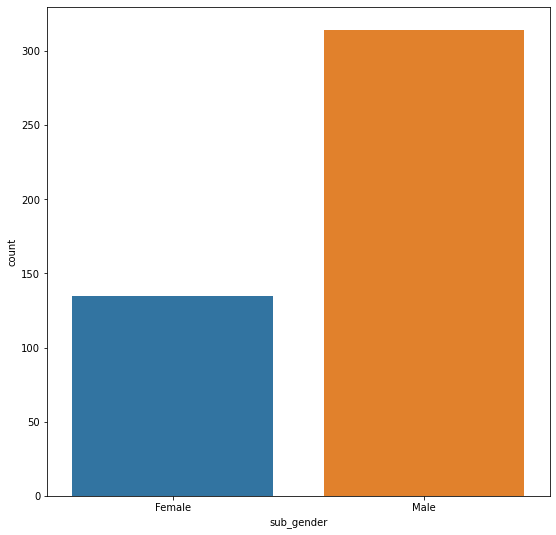

In [14]:
plt.figure(figsize = (9,9))
ax = sns.countplot(x="sub_gender", data=df)

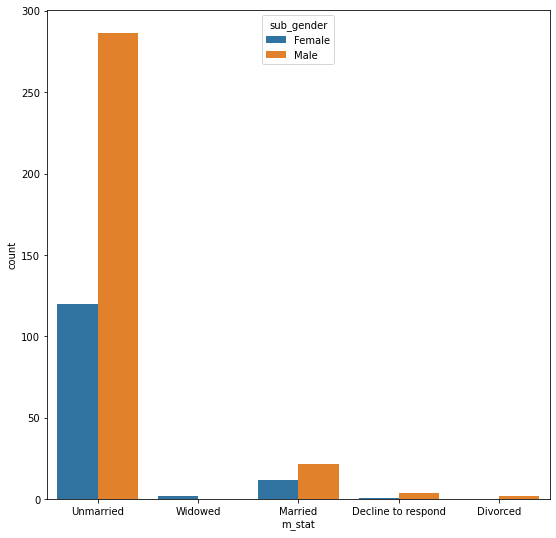

In [15]:
plt.figure(figsize = (9,9))
ax = sns.countplot(x="m_stat", data=df, hue="sub_gender")

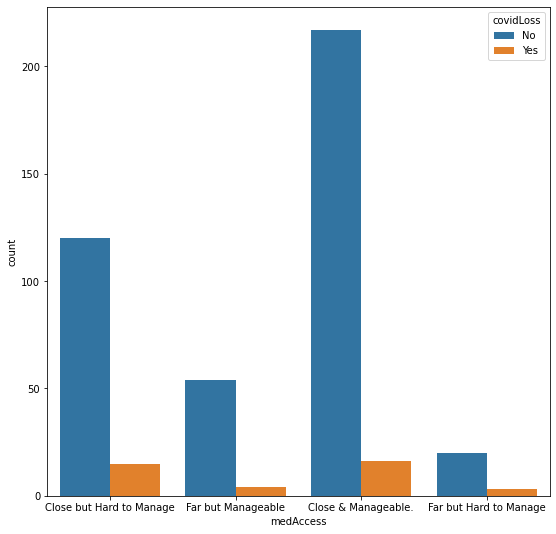

In [16]:
plt.figure(figsize = (9,9))
ax = sns.countplot(x="medAccess", data=df, hue="covidLoss")

# Label for Emotional responses (in contrast to Positive Emotions)
Scale Range : 1-5 represents Least positive - Most Positive

# Label For 'emotion_enjoyment', 'emotion_satisfaction' & 'emotion_thankful'

Strongly Agree=5

Agree=4

Neutral=3

Disagree=2

Strongly Disagree=1

In [17]:
#'emotion_enjoyment', 'emotion_satisfaction', 'emotion_thankful'

replaceDict = {'Strongly Agree':5,'Agree':4, 'Neutral':3, 'Disagree':2,
       'Strongly Disagree':1}

In [18]:
replaceCol = ['emotion_enjoyment', 'emotion_satisfaction', 'emotion_thankful']

In [19]:
for col in replaceCol:
  df[col].replace(replaceDict,inplace = True)

In [20]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,fam_income,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,"40,000 - 69,999 BDT",No,No,Close but Hard to Manage,It is the same as before the lockdown period,4,3,3,Not at all.,Not at all.
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,"70,000 - 100,000 BDT",No,Yes,Far but Manageable,It is the same as before the lockdown period,4,4,4,I do feel it sometimes.,I do feel it sometimes.
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Decline to respond,Yes,No,Close but Hard to Manage,It is the same as before the lockdown period,5,4,3,I haven't paid attention.,I do feel it sometimes.
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,"10,000 - 39,000 BDT",Yes,No,Close & Manageable.,It is the same as before the lockdown period,3,3,4,Not at all.,I don't feel like there is.
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,"10,000 - 39,000 BDT",No,No,Close but Hard to Manage,It has increased a lot during the lockdown period,3,3,2,I do feel it sometimes.,I do feel it sometimes.


# Label For 'emotion_love'

It has increased a lot during the lockdown period=5

It has slightly increased during the lockdown period=4

It is the same as before the lockdown period=3

It has slightly decreased during the lockdown period=2

It has decreased a lot during the lockdown period=1


In [21]:
df['emotion_love'].replace({'It has increased a lot during the lockdown period':5, 'It has slightly increased during the lockdown period':4, 'It is the same as before the lockdown period':3, 'It has slightly decreased during the lockdown period':2,
                              'It has decreased a lot during the lockdown period':1}, inplace = True)

In [22]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,fam_income,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,"40,000 - 69,999 BDT",No,No,Close but Hard to Manage,3,4,3,3,Not at all.,Not at all.
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,"70,000 - 100,000 BDT",No,Yes,Far but Manageable,3,4,4,4,I do feel it sometimes.,I do feel it sometimes.
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Decline to respond,Yes,No,Close but Hard to Manage,3,5,4,3,I haven't paid attention.,I do feel it sometimes.
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,"10,000 - 39,000 BDT",Yes,No,Close & Manageable.,3,3,3,4,Not at all.,I don't feel like there is.
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,"10,000 - 39,000 BDT",No,No,Close but Hard to Manage,5,3,3,2,I do feel it sometimes.,I do feel it sometimes.


# Label For 'emotion_fear' & 'emotion_anxiety'


Not at all=5

I don't feel like there is=4 

I haven't paid attention=3

I do feel it sometimes=2
 
I do feel it most of the time=1,


In [23]:
replaceDict1={'Not at all.':5, "I don't feel like there is.":4, "I haven't paid attention.":3, 'I do feel it sometimes.':2,
    'I do feel it most of the time.':1}

replaceCol1=['emotion_anxiety', 'emotion_fear']

In [24]:
for col in replaceCol1:
  df[col].replace(replaceDict1,inplace = True)


In [25]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,fam_income,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,"40,000 - 69,999 BDT",No,No,Close but Hard to Manage,3,4,3,3,5,5
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,"70,000 - 100,000 BDT",No,Yes,Far but Manageable,3,4,4,4,2,2
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Decline to respond,Yes,No,Close but Hard to Manage,3,5,4,3,3,2
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,"10,000 - 39,000 BDT",Yes,No,Close & Manageable.,3,3,3,4,5,4
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,"10,000 - 39,000 BDT",No,No,Close but Hard to Manage,5,3,3,2,2,2


In [26]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,fam_income,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,"40,000 - 69,999 BDT",No,No,Close but Hard to Manage,3,4,3,3,5,5
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,"70,000 - 100,000 BDT",No,Yes,Far but Manageable,3,4,4,4,2,2
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Decline to respond,Yes,No,Close but Hard to Manage,3,5,4,3,3,2
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,"10,000 - 39,000 BDT",Yes,No,Close & Manageable.,3,3,3,4,5,4
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,"10,000 - 39,000 BDT",No,No,Close but Hard to Manage,5,3,3,2,2,2


In [27]:
df.shape

(449, 22)

In [28]:
#emotion_love	emotion_enjoyment	emotion_satisfaction	emotion_thankful	emotion_fear	emotion_anxiety
finalScore=[]
for score in df.index:
     totalScore = df['emotion_love'][score] + df['emotion_enjoyment'][score] + df['emotion_satisfaction'][score] + df['emotion_thankful'][score] + df['emotion_fear'][score] + df['emotion_anxiety'][score]
     finalScore.append(totalScore)
print(finalScore)

[23, 19, 20, 22, 17, 30, 24, 13, 14, 26, 15, 18, 17, 17, 16, 24, 24, 12, 23, 16, 25, 28, 26, 19, 18, 16, 15, 19, 22, 17, 14, 24, 8, 23, 14, 18, 26, 22, 15, 11, 23, 29, 22, 17, 20, 17, 21, 15, 16, 24, 18, 17, 20, 21, 25, 11, 24, 13, 29, 20, 16, 20, 21, 23, 24, 22, 10, 9, 17, 20, 18, 16, 19, 21, 25, 13, 10, 18, 9, 28, 16, 27, 23, 17, 19, 18, 22, 15, 20, 21, 24, 22, 23, 20, 22, 15, 17, 21, 14, 30, 21, 22, 26, 22, 22, 12, 25, 17, 23, 17, 21, 20, 19, 27, 20, 18, 28, 16, 14, 22, 14, 13, 16, 23, 15, 17, 18, 26, 24, 17, 20, 20, 25, 16, 24, 18, 14, 25, 25, 27, 23, 18, 17, 18, 27, 19, 29, 20, 16, 17, 15, 28, 26, 19, 22, 25, 14, 25, 14, 28, 19, 18, 14, 20, 16, 19, 24, 25, 19, 18, 17, 24, 14, 24, 22, 22, 20, 21, 21, 16, 24, 20, 20, 25, 18, 17, 17, 17, 25, 19, 16, 14, 26, 13, 14, 17, 21, 26, 16, 21, 20, 19, 20, 18, 14, 16, 21, 21, 10, 14, 26, 15, 19, 19, 19, 30, 16, 20, 27, 26, 21, 19, 25, 20, 18, 14, 13, 14, 16, 23, 21, 26, 22, 30, 25, 30, 17, 17, 13, 11, 9, 19, 30, 27, 16, 17, 26, 17, 15, 19, 22,

# Convert Emotions into Target Emotions¶


Scaling target value


target_value>= 19 is Great

13<=target_value<= 18 is Good

1<=target_value<= 12 is Bad

In [29]:
a=0
b=0
c=0
targetEmotion = []
for score in finalScore:
  if score >= 19:
    a=a+1
    print(score,':Great')
    print()
    targetEmotion.append('Great')
  elif score>= 13 and score <= 18:
    b=b+1
    print(score,':Good')
    print()
    targetEmotion.append('Good')
  elif score<13:
    c=c+1
    print(score,':Bad')
    print()
    targetEmotion.append('Bad')
    
print(a,b,c)    

23 :Great

19 :Great

20 :Great

22 :Great

17 :Good

30 :Great

24 :Great

13 :Good

14 :Good

26 :Great

15 :Good

18 :Good

17 :Good

17 :Good

16 :Good

24 :Great

24 :Great

12 :Bad

23 :Great

16 :Good

25 :Great

28 :Great

26 :Great

19 :Great

18 :Good

16 :Good

15 :Good

19 :Great

22 :Great

17 :Good

14 :Good

24 :Great

8 :Bad

23 :Great

14 :Good

18 :Good

26 :Great

22 :Great

15 :Good

11 :Bad

23 :Great

29 :Great

22 :Great

17 :Good

20 :Great

17 :Good

21 :Great

15 :Good

16 :Good

24 :Great

18 :Good

17 :Good

20 :Great

21 :Great

25 :Great

11 :Bad

24 :Great

13 :Good

29 :Great

20 :Great

16 :Good

20 :Great

21 :Great

23 :Great

24 :Great

22 :Great

10 :Bad

9 :Bad

17 :Good

20 :Great

18 :Good

16 :Good

19 :Great

21 :Great

25 :Great

13 :Good

10 :Bad

18 :Good

9 :Bad

28 :Great

16 :Good

27 :Great

23 :Great

17 :Good

19 :Great

18 :Good

22 :Great

15 :Good

20 :Great

21 :Great

24 :Great

22 :Great

23 :Great

20 :Great

22 :Great

15 :Good

In [30]:
df['targetemotion']=targetEmotion

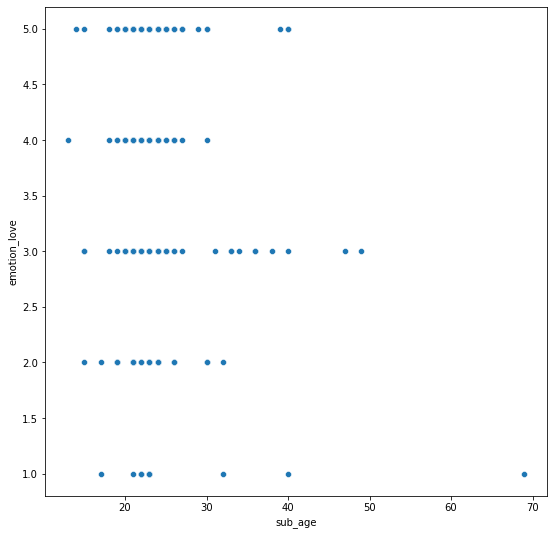

In [31]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_love', data = df );

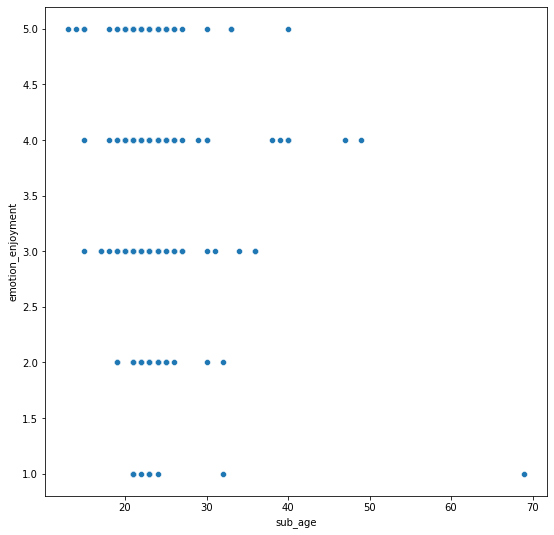

In [32]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_enjoyment', data = df );

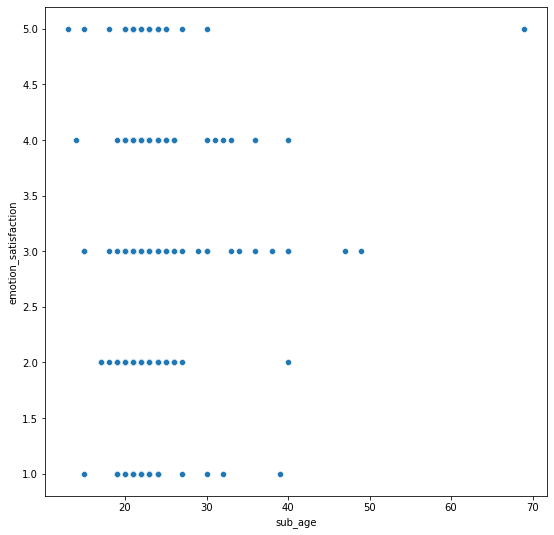

In [33]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_satisfaction', data = df );

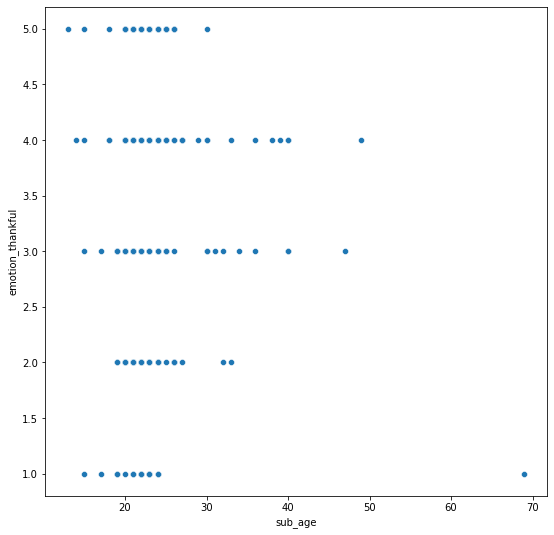

In [34]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_thankful', data = df );

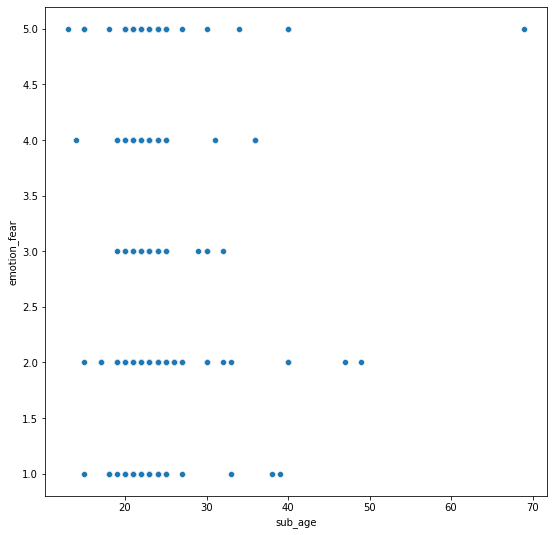

In [35]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_fear', data = df );

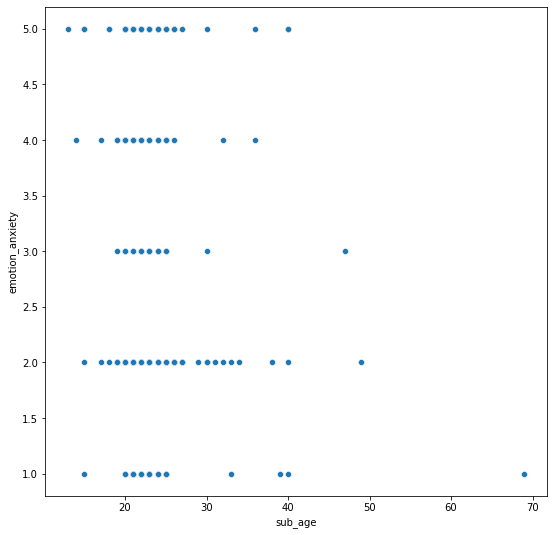

In [36]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'emotion_anxiety', data = df );

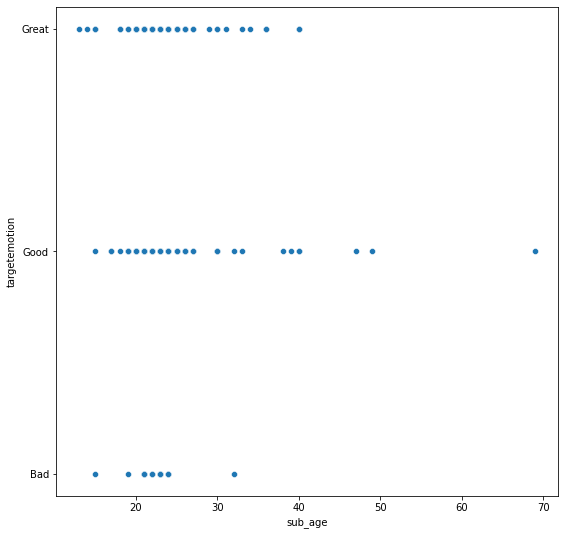

In [37]:
plt.figure(figsize = (9,9))
sns.scatterplot(x = 'sub_age', y = 'targetemotion', data = df );

In [38]:
df.shape

(449, 23)

# Label For medAccess

Close but Hard to Manage=CH,

Far but Manageable=FM,

Close & Manageable=CM,

Far but Hard to Manage=FH
            

In [39]:
df['medAccess'].replace({'Close but Hard to Manage':'CH', 'Far but Manageable':'FM',
       'Close & Manageable.':'CM', 'Far but Hard to Manage':'FH'}, inplace = True)

In [40]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,targetemotion
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,No,No,CH,3,4,3,3,5,5,Great
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,No,Yes,FM,3,4,4,4,2,2,Great
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Yes,No,CH,3,5,4,3,3,2,Great
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,Yes,No,CM,3,3,3,4,5,4,Great
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,No,No,CH,5,3,3,2,2,2,Good


# Label For fam_res


Urban Area=UA,
    
Rural Area=RA, 
    
Suburban Area=SA

In [41]:
df['fam_res'].replace({'Urban Area':'UA', 'Rural Area':'RA', 'Suburban Area':'SA'}, inplace = True)

In [42]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,targetemotion
0,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,4,23.0,3,1,...,No,No,CH,3,4,3,3,5,5,Great
1,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,38.5,3,0,...,No,Yes,FM,3,4,4,4,2,2,Great
2,21,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,6,16.0,3,3,...,Yes,No,CH,3,5,4,3,3,2,Great
3,21,Female,Unmarried,Student,"Less than 10,000 BDT",Nuclear Family,3,40.0,3,0,...,Yes,No,CM,3,3,3,4,5,4,Great
4,20,Female,Unmarried,Student,I do not have any income at the moment,Nuclear Family,5,29.0,3,2,...,No,No,CH,5,3,3,2,2,2,Good


# Label For fam_income & sub_income

I do not have any income at the moment = NA,

Less than 10,000 BDT= LC,

'10,000 - 39,000 BDT' = LMC,

'40,000 - 69,999 BDT' = MC

'70,000 - 100,000 BDT' = HMC,

More than 100,000 BDT = HC,

Decline to respond' = DR


In [43]:
incomeScale = {'40,000 - 69,999 BDT':'MC', '70,000 - 100,000 BDT':'HMC',
       'Decline to respond':'DR', '10,000 - 39,000 BDT':'LMC',
       'More than 100,000 BDT':'HC', 'Less than 10,000 BDT':'LC'}

In [44]:
df['fam_income'].replace(incomeScale, inplace = True)

In [45]:
incomeScale = {'40,000 - 69,999 BDT':'MC', '70,000 - 100,000 BDT':'HMC',
       'Decline to respond':'DR', '10,000 - 39,000 BDT':'LMC',
       'More than 100,000 BDT':'HC', 'Less than 10,000 BDT':'LC','I do not have any income at the moment':'NA'}


In [46]:
df['sub_income'].replace(incomeScale, inplace = True)

In [47]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,targetemotion
0,20,Female,Unmarried,Student,NA,Nuclear Family,4,23.0,3,1,...,No,No,CH,3,4,3,3,5,5,Great
1,21,Female,Unmarried,Student,LC,Nuclear Family,3,38.5,3,0,...,No,Yes,FM,3,4,4,4,2,2,Great
2,21,Female,Unmarried,Student,NA,Nuclear Family,6,16.0,3,3,...,Yes,No,CH,3,5,4,3,3,2,Great
3,21,Female,Unmarried,Student,LC,Nuclear Family,3,40.0,3,0,...,Yes,No,CM,3,3,3,4,5,4,Great
4,20,Female,Unmarried,Student,NA,Nuclear Family,5,29.0,3,2,...,No,No,CH,5,3,3,2,2,2,Good


In [48]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,targetemotion
0,20,Female,Unmarried,Student,NA,Nuclear Family,4,23.0,3,1,...,No,No,CH,3,4,3,3,5,5,Great
1,21,Female,Unmarried,Student,LC,Nuclear Family,3,38.5,3,0,...,No,Yes,FM,3,4,4,4,2,2,Great
2,21,Female,Unmarried,Student,NA,Nuclear Family,6,16.0,3,3,...,Yes,No,CH,3,5,4,3,3,2,Great
3,21,Female,Unmarried,Student,LC,Nuclear Family,3,40.0,3,0,...,Yes,No,CM,3,3,3,4,5,4,Great
4,20,Female,Unmarried,Student,NA,Nuclear Family,5,29.0,3,2,...,No,No,CH,5,3,3,2,2,2,Good


In [49]:
df.shape

(449, 23)

In [50]:
df.head()

,sub_age,sub_gender,m_stat,sub_prof,sub_income,fam_struct,fam_memCount,fam_age,fam_adultCount,fam_childCount,...,covidStat,covidLoss,medAccess,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,emotion_anxiety,targetemotion
0,20,Female,Unmarried,Student,NA,Nuclear Family,4,23.0,3,1,...,No,No,CH,3,4,3,3,5,5,Great
1,21,Female,Unmarried,Student,LC,Nuclear Family,3,38.5,3,0,...,No,Yes,FM,3,4,4,4,2,2,Great
2,21,Female,Unmarried,Student,NA,Nuclear Family,6,16.0,3,3,...,Yes,No,CH,3,5,4,3,3,2,Great
3,21,Female,Unmarried,Student,LC,Nuclear Family,3,40.0,3,0,...,Yes,No,CM,3,3,3,4,5,4,Great
4,20,Female,Unmarried,Student,NA,Nuclear Family,5,29.0,3,2,...,No,No,CH,5,3,3,2,2,2,Good


In [51]:
#Since we are not working with Dropcol1
dropcol1=['m_stat', 'sub_prof','fam_age']
df.drop(columns=dropcol1, inplace=True)

In [52]:
df.shape

(449, 20)

In [53]:
#Dropping data we felt were not necessary.
faultyData = [20000,12,30000,7000,0]
storeDropIndex = []
for data in faultyData:
  for index, row in df.iterrows():
    if row['fam_earnerCount'] == data:
      print(index,": ",row['fam_earnerCount']) 
      storeDropIndex.append(index)

7 :  20000
8 :  12
49 :  30000
90 :  7000
118 :  0
123 :  0
171 :  0
245 :  0
256 :  0
385 :  0
402 :  0


In [54]:
df.drop(storeDropIndex, inplace = True )

In [55]:
df.shape

(438, 20)

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Splitting Categorical Data

In [57]:
cat_features = ['sub_gender','sub_income','fam_struct','fam_res','fam_income','covidStat','medAccess',"covidLoss"]

In [58]:
df = pd.get_dummies(data = df, columns = cat_features)

In [59]:
df.head()

,sub_age,fam_memCount,fam_adultCount,fam_childCount,fam_earnerCount,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,...,fam_income_MC,covidStat_Asymptomatic,covidStat_No,covidStat_Yes,medAccess_CH,medAccess_CM,medAccess_FH,medAccess_FM,covidLoss_No,covidLoss_Yes
0,20,4,3,1,1,3,4,3,3,5,...,1,0,1,0,1,0,0,0,1,0
1,21,3,3,0,1,3,4,4,4,2,...,0,0,1,0,0,0,0,1,0,1
2,21,6,3,3,2,3,5,4,3,3,...,0,0,0,1,1,0,0,0,1,0
3,21,3,3,0,1,3,3,3,4,5,...,0,0,0,1,0,1,0,0,1,0
4,20,5,3,2,1,5,3,3,2,2,...,0,0,1,0,1,0,0,0,1,0


In [60]:
#the columns that require scaling include
# CreditScore
# Age
# Balance
# EstimatedSalary
scale_vars = ['sub_age','fam_memCount','fam_adultCount','fam_childCount','fam_earnerCount','emotion_love','emotion_enjoyment','emotion_satisfaction','emotion_thankful','emotion_fear','emotion_anxiety']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df.head()

,sub_age,fam_memCount,fam_adultCount,fam_childCount,fam_earnerCount,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,...,fam_income_MC,covidStat_Asymptomatic,covidStat_No,covidStat_Yes,medAccess_CH,medAccess_CM,medAccess_FH,medAccess_FM,covidLoss_No,covidLoss_Yes
0,0.194444,0.090909,0.03125,0.043478,0.000,0.5,0.75,0.50,0.50,1.00,...,1,0,1,0,1,0,0,0,1,0
1,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.75,0.75,0.75,0.25,...,0,0,1,0,0,0,0,1,0,1
2,0.222222,0.181818,0.03125,0.130435,0.125,0.5,1.00,0.75,0.50,0.50,...,0,0,0,1,1,0,0,0,1,0
3,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.50,0.50,0.75,1.00,...,0,0,0,1,0,1,0,0,1,0
4,0.194444,0.136364,0.03125,0.086957,0.000,1.0,0.50,0.50,0.25,0.25,...,0,0,1,0,1,0,0,0,1,0


In [61]:
# Separate Independent (X) and Dependent(y) features

y = df['targetemotion']
X = df.drop(columns = ['targetemotion'])

In [62]:
df.shape

(438, 41)

In [63]:
df.head()

,sub_age,fam_memCount,fam_adultCount,fam_childCount,fam_earnerCount,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,...,fam_income_MC,covidStat_Asymptomatic,covidStat_No,covidStat_Yes,medAccess_CH,medAccess_CM,medAccess_FH,medAccess_FM,covidLoss_No,covidLoss_Yes
0,0.194444,0.090909,0.03125,0.043478,0.000,0.5,0.75,0.50,0.50,1.00,...,1,0,1,0,1,0,0,0,1,0
1,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.75,0.75,0.75,0.25,...,0,0,1,0,0,0,0,1,0,1
2,0.222222,0.181818,0.03125,0.130435,0.125,0.5,1.00,0.75,0.50,0.50,...,0,0,0,1,1,0,0,0,1,0
3,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.50,0.50,0.75,1.00,...,0,0,0,1,0,1,0,0,1,0
4,0.194444,0.136364,0.03125,0.086957,0.000,1.0,0.50,0.50,0.25,0.25,...,0,0,1,0,1,0,0,0,1,0


In [64]:
X.head()

,sub_age,fam_memCount,fam_adultCount,fam_childCount,fam_earnerCount,emotion_love,emotion_enjoyment,emotion_satisfaction,emotion_thankful,emotion_fear,...,fam_income_MC,covidStat_Asymptomatic,covidStat_No,covidStat_Yes,medAccess_CH,medAccess_CM,medAccess_FH,medAccess_FM,covidLoss_No,covidLoss_Yes
0,0.194444,0.090909,0.03125,0.043478,0.000,0.5,0.75,0.50,0.50,1.00,...,1,0,1,0,1,0,0,0,1,0
1,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.75,0.75,0.75,0.25,...,0,0,1,0,0,0,0,1,0,1
2,0.222222,0.181818,0.03125,0.130435,0.125,0.5,1.00,0.75,0.50,0.50,...,0,0,0,1,1,0,0,0,1,0
3,0.222222,0.045455,0.03125,0.000000,0.000,0.5,0.50,0.50,0.75,1.00,...,0,0,0,1,0,1,0,0,1,0
4,0.194444,0.136364,0.03125,0.086957,0.000,1.0,0.50,0.50,0.25,0.25,...,0,0,1,0,1,0,0,0,1,0


In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(350, 40)
(88, 40)


Showing the correct labels from the distribution of emotional scores

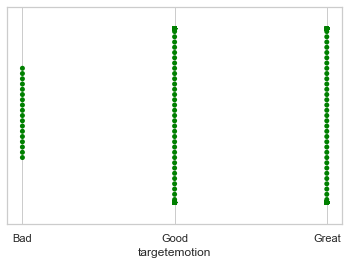

In [66]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x=y_train,color='Green')

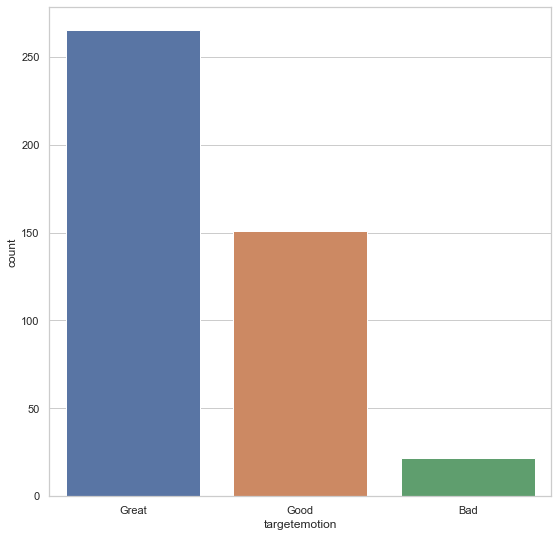

In [67]:
plt.figure(figsize = (9,9))
ax = sns.countplot(x=y)

In [68]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

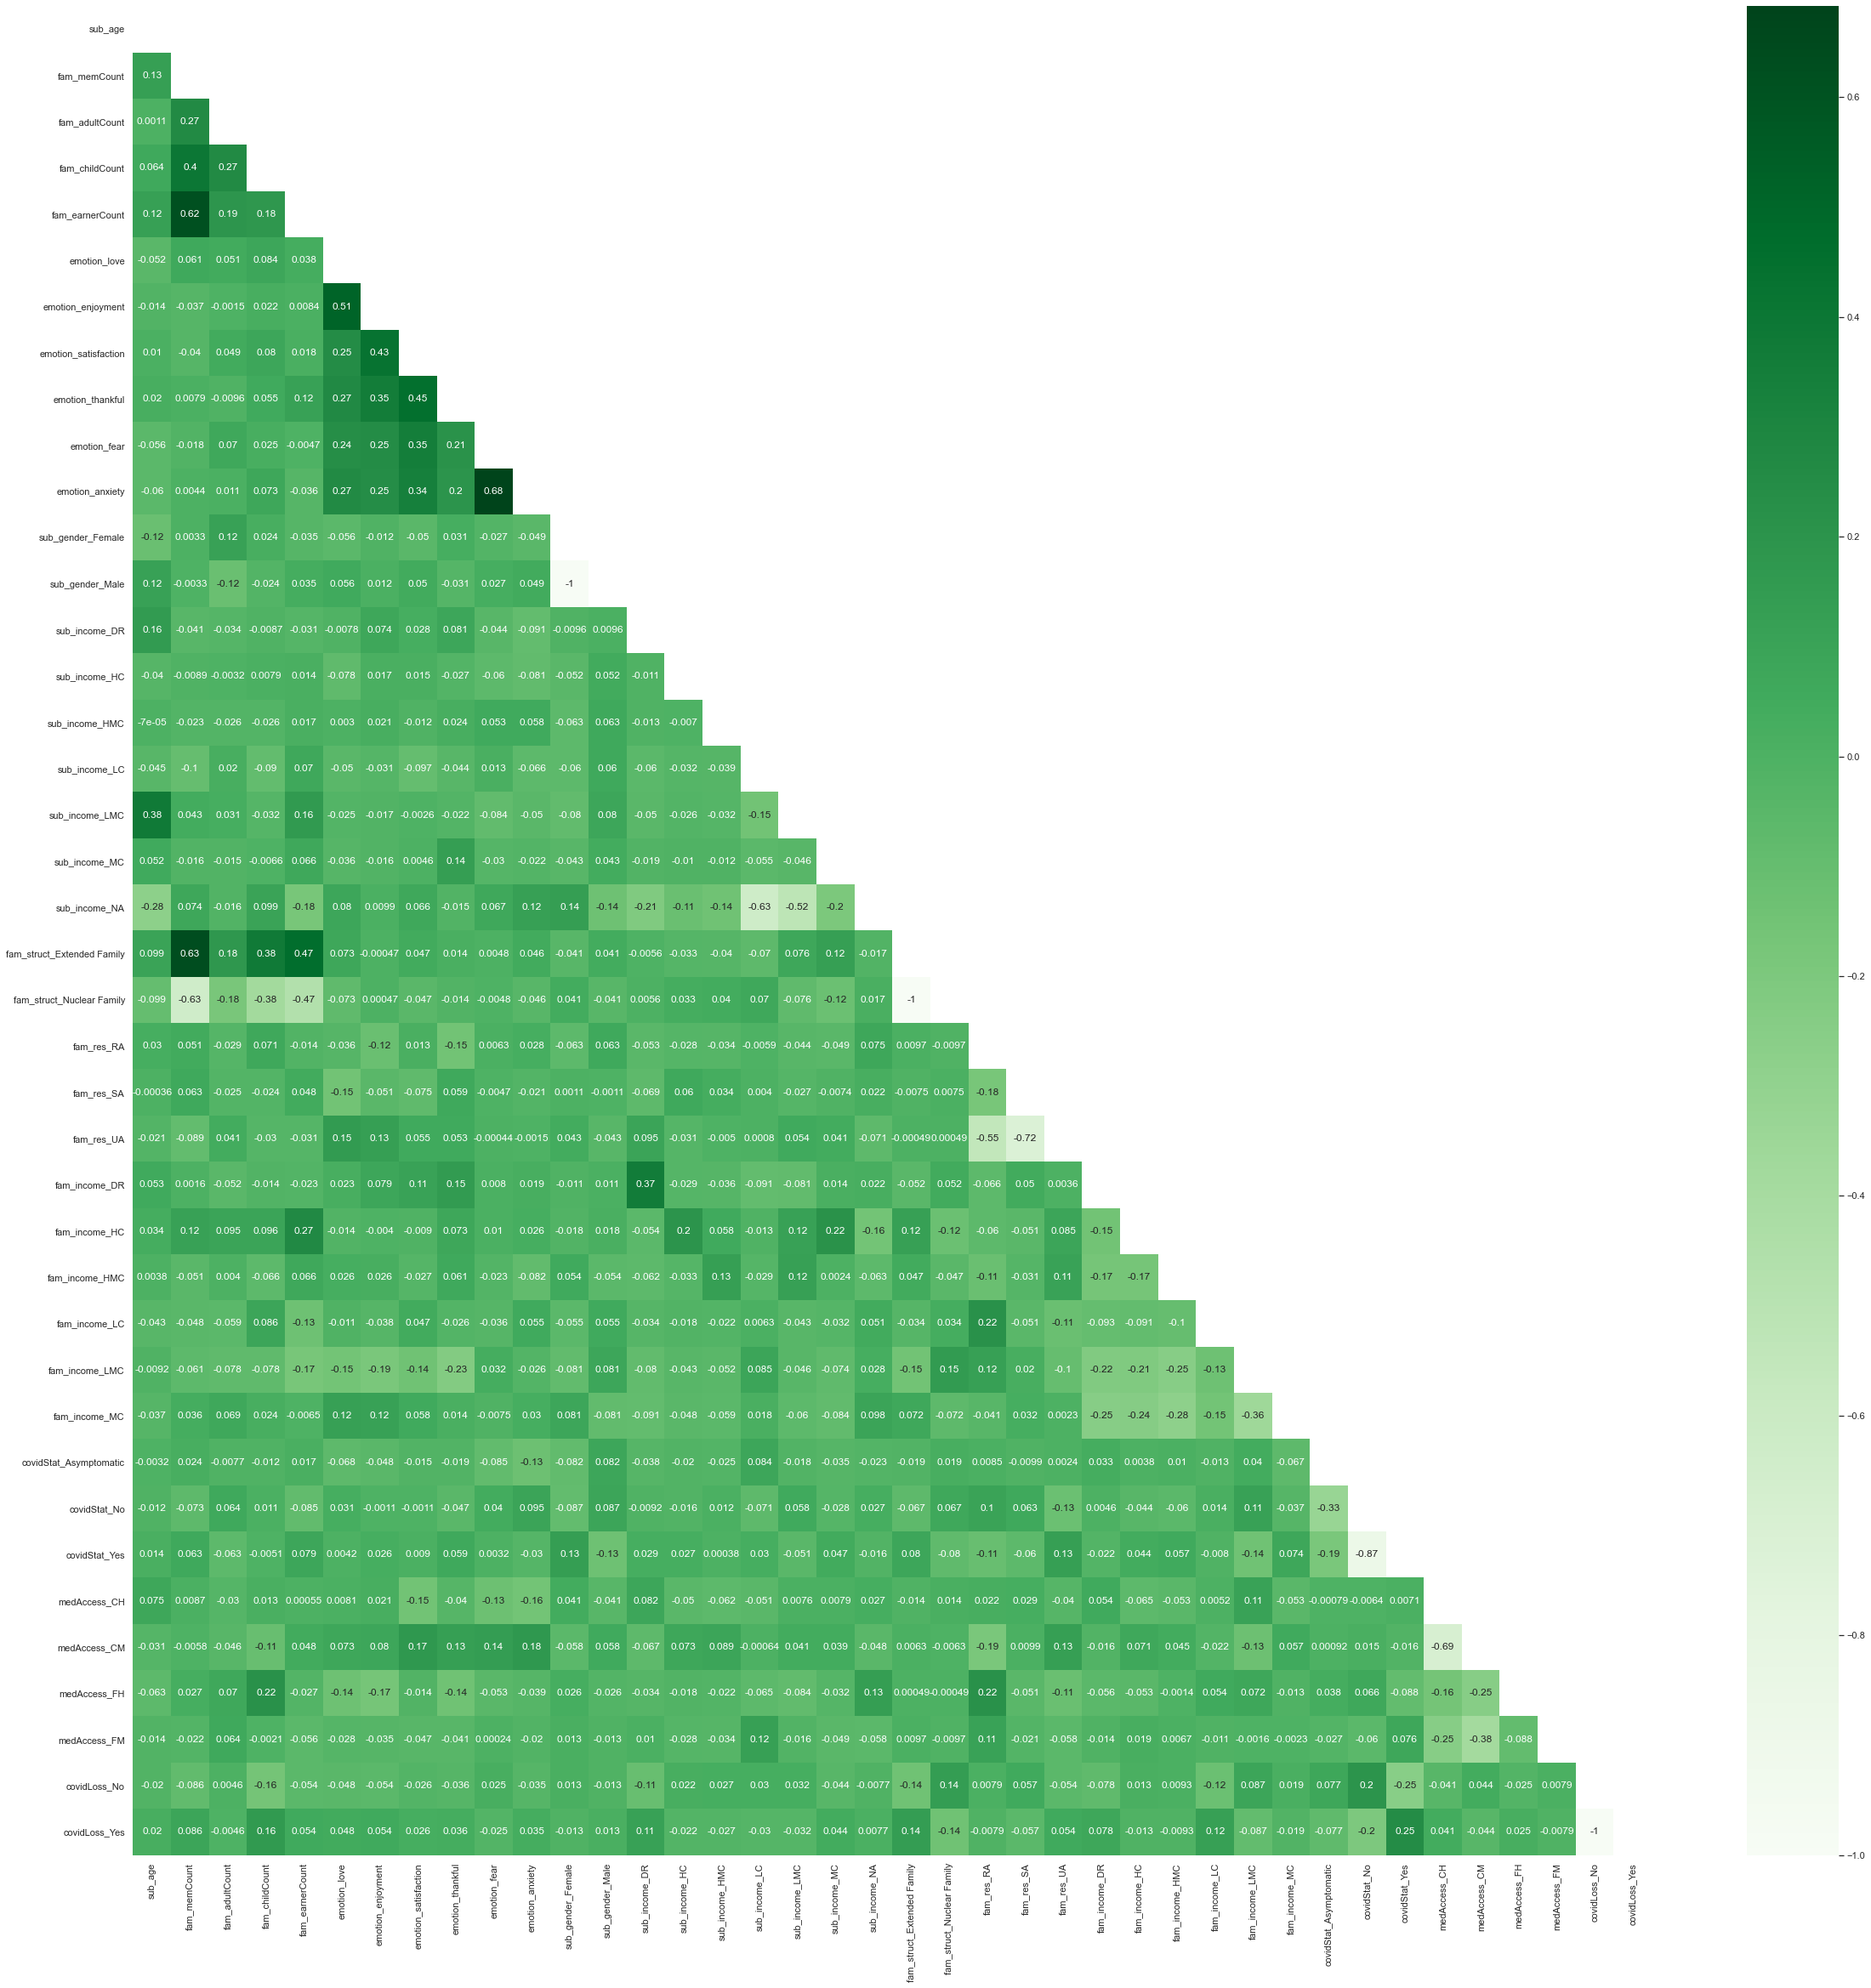

In [69]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (40,40))
sns.heatmap(corr, annot = True, cmap = "Greens", mask = mask1);

In [70]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [71]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

3
{'fam_struct_Nuclear Family', 'sub_gender_Male', 'covidLoss_Yes'}


In [72]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

# Model Creation and Evaluation

Depth =  2 , Training Accuracy =  0.8057142857142857 , Test Accuracy =  0.7386363636363636 , Diff =  6.707792207792207  %
Depth =  3 , Training Accuracy =  0.8542857142857143 , Test Accuracy =  0.75 , Diff =  10.42857142857143  %
Depth =  4 , Training Accuracy =  0.8971428571428571 , Test Accuracy =  0.8295454545454546 , Diff =  6.759740259740255  %
Depth =  5 , Training Accuracy =  0.9342857142857143 , Test Accuracy =  0.8295454545454546 , Diff =  10.474025974025968  %
Depth =  6 , Training Accuracy =  0.9571428571428572 , Test Accuracy =  0.7840909090909091 , Diff =  17.305194805194812  %
Depth =  7 , Training Accuracy =  0.98 , Test Accuracy =  0.7954545454545454 , Diff =  18.454545454545457  %
Depth =  8 , Training Accuracy =  0.9828571428571429 , Test Accuracy =  0.8068181818181818 , Diff =  17.603896103896112  %
Depth =  9 , Training Accuracy =  0.9914285714285714 , Test Accuracy =  0.8295454545454546 , Diff =  16.188311688311686  %
Depth =  10 , Training Accuracy =  0.9971428571

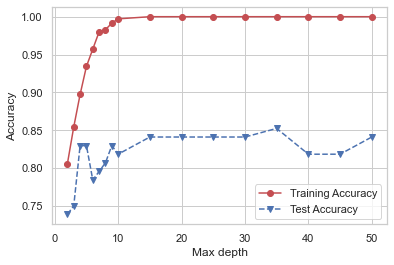

In [73]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_pred_Test)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))

[[ 3  1  0]
 [ 1 18  4]
 [ 0  8 53]]


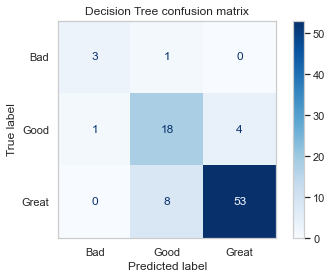

In [74]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('Decision Tree confusion matrix')
plt.grid(False)
plt.show()

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7272727272727273 , Difference =  27.27272727272727 %
K =  5 , Training Accuracy =  0.84  Test Accuracy =  0.75 , Difference =  8.999999999999996 %
K =  10 , Training Accuracy =  0.8171428571428572  Test Accuracy =  0.7386363636363636 , Difference =  7.850649350649352 %
K =  15 , Training Accuracy =  0.7828571428571428  Test Accuracy =  0.8295454545454546 , Difference =  4.668831168831177 %
K =  20 , Training Accuracy =  0.7742857142857142  Test Accuracy =  0.8181818181818182 , Difference =  4.389610389610398 %
K =  25 , Training Accuracy =  0.7771428571428571  Test Accuracy =  0.8295454545454546 , Difference =  5.240259740259745 %
K =  30 , Training Accuracy =  0.7857142857142857  Test Accuracy =  0.8068181818181818 , Difference =  2.110389610389607 %
-------------------------------------
Confusion Matrix for the Test Case
[[ 0  4  0]
 [ 0 12 11]
 [ 0  2 59]]

Classification Report
              precision    recall  f1-score   suppo

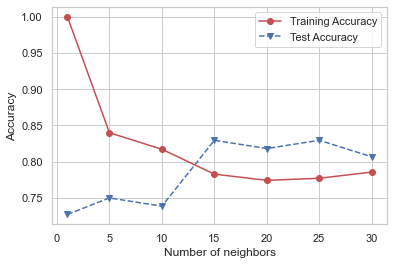

In [75]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_pred_Test))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1
    
    
#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))    

[[ 0  4  0]
 [ 0 12 11]
 [ 0  2 59]]


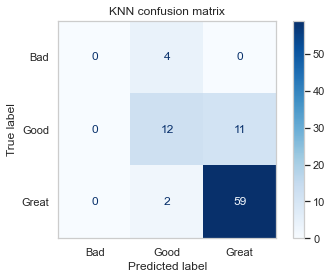

In [76]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('KNN confusion matrix')
plt.grid(False)
plt.show()

In [77]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 5)
clf = DecisionTreeClassifier()

results = cross_val_score(clf, X, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.81818182 0.80681818 0.81818182 0.81609195 0.83908046]

Results =  0.8196708463949843 +/- 0.010575130814750073


In [78]:
# For imbalance dataset
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))


[0.80681818 0.84090909 0.84090909 0.82758621 0.83908046]

Results =  0.831060606060606 +/- 0.013100152242202822


In [79]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.9028571428571428
Test Accuracy:  0.8522727272727273


[[ 0  4  0]
 [ 0 22  1]
 [ 0  8 53]]


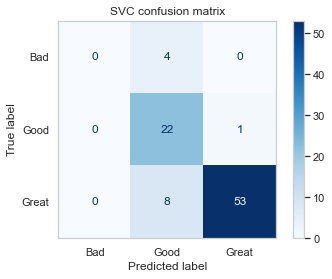

In [80]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('SVC confusion matrix')
plt.grid(False)
plt.show()

In [100]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9748427672955975

Logistic Regression with L2 regularization
Train Accuracy:  0.9858490566037735
Test Accuracy:  0.9685534591194969


[[49  0  0]
 [ 2 54  1]
 [ 0  2 51]]


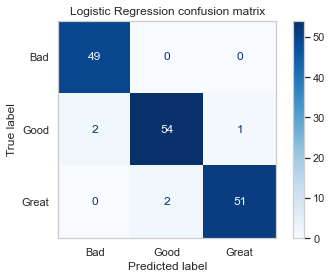

In [101]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('Logistic Regression confusion matrix')
plt.grid(False)
plt.show()

In [82]:
unique, count= np.unique(y, return_counts=True)
counts={k:v for (k,v) in zip (unique, count)}
counts

{'Bad': 22, 'Good': 151, 'Great': 265}

# After Smote

In [83]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=10)
X, y=sm.fit_resample(X, y)

In [84]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

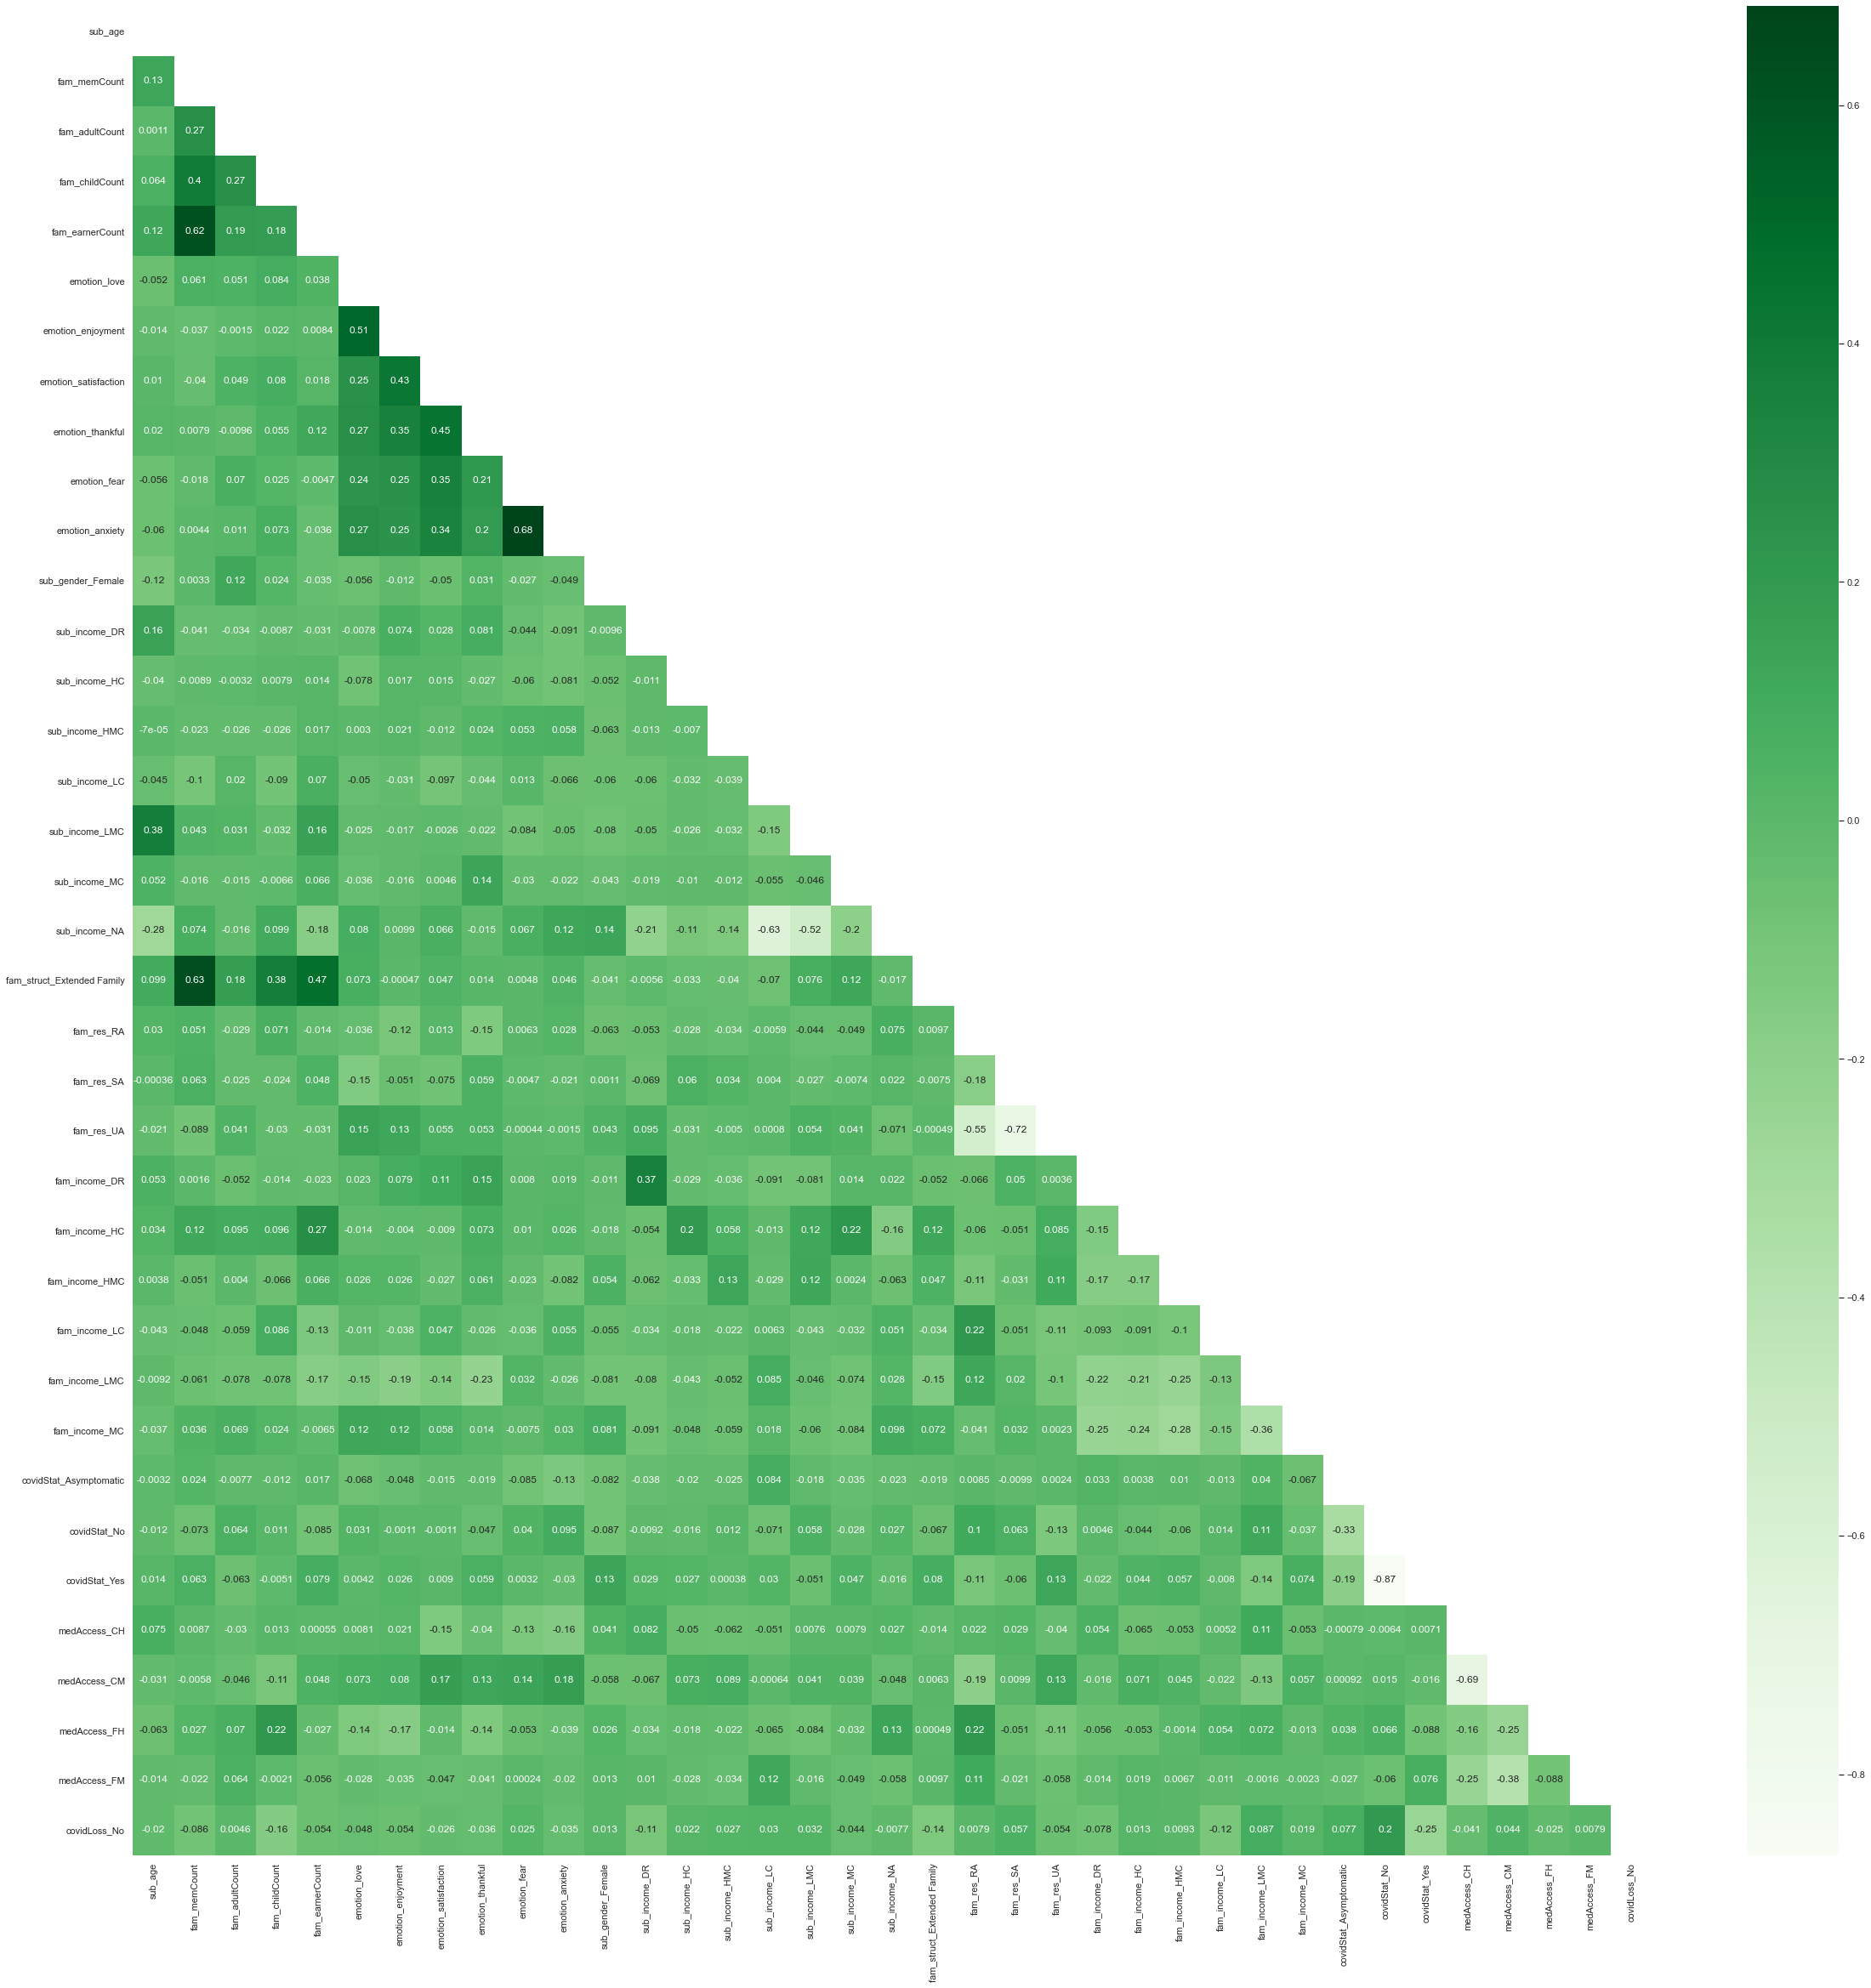

In [85]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (40,40))
sns.heatmap(corr, annot = True, cmap = "Greens", mask = mask1);

In [86]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [87]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [88]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

In [89]:
unique, count= np.unique(y, return_counts=True)
counts={k:v for (k,v) in zip (unique, count)}
counts

{'Bad': 265, 'Good': 265, 'Great': 265}

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(636, 40)
(159, 40)


# Model Creation and Evaluation

In [91]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# for i in range(2,30):    
kfold_validation = KFold(n_splits = 5)
clf = DecisionTreeClassifier()

results = cross_val_score(clf,X, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.8427673  0.83018868 0.93081761 1.         0.97484277]

Results =  0.9157232704402516 +/- 0.06850439649906968


Depth =  2 , Training Accuracy =  0.8207547169811321 , Test Accuracy =  0.8805031446540881 , Diff =  5.974842767295597  %
Depth =  3 , Training Accuracy =  0.8584905660377359 , Test Accuracy =  0.8742138364779874 , Diff =  1.5723270440251569  %
Depth =  4 , Training Accuracy =  0.9198113207547169 , Test Accuracy =  0.9308176100628931 , Diff =  1.1006289308176154  %
Depth =  5 , Training Accuracy =  0.949685534591195 , Test Accuracy =  0.9308176100628931 , Diff =  1.8867924528301883  %
Depth =  6 , Training Accuracy =  0.9638364779874213 , Test Accuracy =  0.9371069182389937 , Diff =  2.672955974842761  %
Depth =  7 , Training Accuracy =  0.9795597484276729 , Test Accuracy =  0.9056603773584906 , Diff =  7.389937106918232  %
Depth =  8 , Training Accuracy =  0.9937106918238994 , Test Accuracy =  0.9245283018867925 , Diff =  6.91823899371069  %
Depth =  9 , Training Accuracy =  0.9968553459119497 , Test Accuracy =  0.9182389937106918 , Diff =  7.861635220125784  %
Depth =  10 , Training 

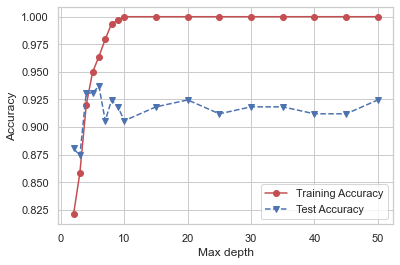

In [92]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_pred_Test)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))

[[48  1  0]
 [ 2 51  4]
 [ 0  5 48]]


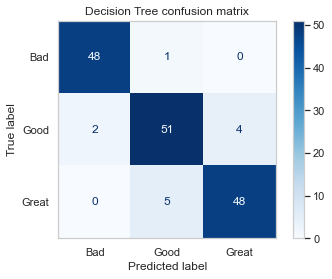

In [93]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('Decision Tree confusion matrix')
plt.grid(False)
plt.show()

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8616352201257862 , Difference =  13.83647798742138 %
K =  5 , Training Accuracy =  0.8946540880503144  Test Accuracy =  0.8427672955974843 , Difference =  5.188679245283012 %
K =  10 , Training Accuracy =  0.8427672955974843  Test Accuracy =  0.7924528301886793 , Difference =  5.031446540880502 %
K =  15 , Training Accuracy =  0.8301886792452831  Test Accuracy =  0.779874213836478 , Difference =  5.031446540880502 %
K =  20 , Training Accuracy =  0.8128930817610063  Test Accuracy =  0.7735849056603774 , Difference =  3.9308176100628867 %
K =  25 , Training Accuracy =  0.8144654088050315  Test Accuracy =  0.7987421383647799 , Difference =  1.5723270440251569 %
K =  30 , Training Accuracy =  0.7955974842767296  Test Accuracy =  0.7735849056603774 , Difference =  2.2012578616352196 %
-------------------------------------
Confusion Matrix for the Test Case
[[49  0  0]
 [17 38  2]
 [ 4 13 36]]

Classification Report
              precisi

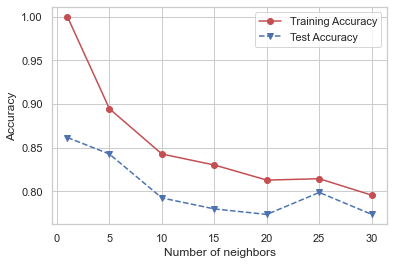

In [94]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_pred_Test))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))       

[[49  0  0]
 [17 38  2]
 [ 4 13 36]]


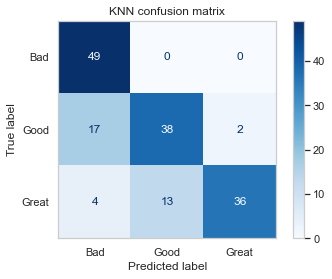

In [95]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('KNN confusion matrix')
plt.grid(False)
plt.show()

In [96]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.9481132075471698
Test Accuracy:  0.9371069182389937


[[49  0  0]
 [ 3 54  0]
 [ 0  7 46]]


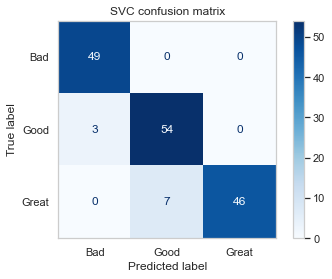

In [97]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('SVC confusion matrix')
plt.grid(False)
plt.show()

In [98]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9748427672955975

Logistic Regression with L2 regularization
Train Accuracy:  0.9858490566037735
Test Accuracy:  0.9685534591194969


[[49  0  0]
 [ 2 54  1]
 [ 0  2 51]]


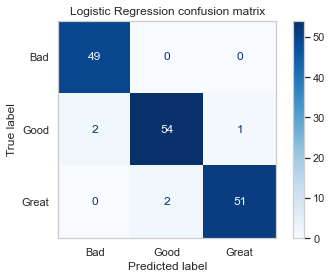

In [99]:
class_names=['Bad','Good','Great']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.title('Logistic Regression confusion matrix')
plt.grid(False)
plt.show()